In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os

sys.path.append(os.path.abspath(".."))

In [13]:
train_data = pd.read_csv('../data/train.csv', encoding='windows-1251', sep=',', low_memory=False)
test_data = pd.read_csv('../data/test.csv')

# Exploratory data analysis
Lets take a look on data

In [14]:
train_data.head(-1)

,Age,FamilySize,PastDueLess_60,PastDue60_90,PastDue90_More,DebtRatio,MonthlyIncome,TotalBalanceDivideCreditLimits,OpenLoans,RealEstateLoans,Target
0,56.0,1.0,1.0,0.0,0.0,0.060571859,5315.0,0.498037042,9.0,0.0,0.0
1,38.0,1.0,0.0,0.0,0.0,0.176964607,3333.0,0.060600137,5.0,0.0,0.0
2,42.0,2.0,1.0,0.0,0.0,0.412141333,8433.0,0.675397653,8.0,1.0,0.0
3,34.0,1.0,2.0,0.0,0.0,0.341436766,3660.0,0.630550175,10.0,0.0,0.0
4,102.0,1.0,0.0,0.0,0.0,0.273844353,3417.0,0.109641899,7.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
116179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Missing data

In [15]:
train_data.isnull().sum()

Age                               16184
FamilySize                        18856
PastDueLess_60                    16184
PastDue60_90                      16184
PastDue90_More                    16184
DebtRatio                         16184
MonthlyIncome                     35934
TotalBalanceDivideCreditLimits    16184
OpenLoans                         16184
RealEstateLoans                   16184
Target                            16184
dtype: int64

Train data has at least 16,184 missing values; these are completely empty rows at the end — we'll remove them.

In [16]:
train_data = train_data.iloc[:-16184]
train_data.isnull().sum()

Age                                   0
FamilySize                         2672
PastDueLess_60                        0
PastDue60_90                          0
PastDue90_More                        0
DebtRatio                             0
MonthlyIncome                     19750
TotalBalanceDivideCreditLimits        0
OpenLoans                             0
RealEstateLoans                       0
Target                                0
dtype: int64

Let's explore the data

In [17]:
train_data.describe(include='all')

,Age,FamilySize,PastDueLess_60,PastDue60_90,PastDue90_More,DebtRatio,MonthlyIncome,TotalBalanceDivideCreditLimits,OpenLoans,RealEstateLoans,Target
count,100001.000000,97329.000000,100001.000000,100001.000000,100001.000000,100001,8.025100e+04,100001,100001.000000,100001.000000,100001.000000
unique,NaN,NaN,NaN,NaN,NaN,78966,NaN,84410,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,2769,NaN,7306,NaN,NaN,NaN
mean,52.272627,0.760215,0.432916,0.249808,0.275807,NaN,6.690901e+03,NaN,8.442306,1.018020,0.066739
std,14.765124,1.116240,4.300689,4.264301,4.277969,NaN,1.647731e+04,NaN,5.137405,1.131855,0.249571
min,21.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000e+00,NaN,0.000000,0.000000,0.000000
25%,41.000000,0.000000,0.000000,0.000000,0.000000,NaN,3.400000e+03,NaN,5.000000,0.000000,0.000000
50%,52.000000,0.000000,0.000000,0.000000,0.000000,NaN,5.398000e+03,NaN,8.000000,1.000000,0.000000
75%,63.000000,1.000000,0.000000,0.000000,0.000000,NaN,8.250000e+03,NaN,11.000000,2.000000,0.000000


In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Age                             100001 non-null  float64
 1   FamilySize                      97329 non-null   float64
 2   PastDueLess_60                  100001 non-null  float64
 3   PastDue60_90                    100001 non-null  float64
 4   PastDue90_More                  100001 non-null  float64
 5   DebtRatio                       100001 non-null  object 
 6   MonthlyIncome                   80251 non-null   float64
 7   TotalBalanceDivideCreditLimits  100001 non-null  object 
 8   OpenLoans                       100001 non-null  float64
 9   RealEstateLoans                 100001 non-null  float64
 10  Target                          100001 non-null  float64
dtypes: float64(9), object(2)
memory usage: 8.4+ MB


Let's explore and remove outliers in the training data

In [22]:
train_data['FamilySize'].value_counts()

FamilySize
0.0     57739
1.0     17607
2.0     13040
3.0      6389
4.0      1909
5.0       481
6.0       104
7.0        37
8.0        13
9.0         4
10.0        4
13.0        1
20.0        1
Name: count, dtype: int64

In [ ]:
from feature.feature_engeeniring import filter_family_size

train_data = filter_family_size(train_data, 10)

MonthlyIncome has about 19000 outliers and not distributed normally, so it's hard to fix using mean. We will use linear reggression imputation

(0.0, 100000.0)

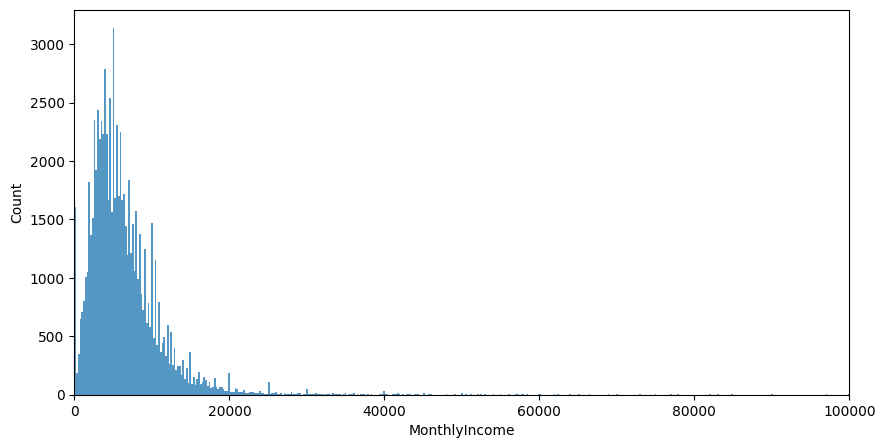

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(data=train_data, x='MonthlyIncome')
plt.xlim(0, 100000)

In [30]:
from feature.feature_engeeniring import impute_with_regression

train_data = impute_with_regression(train_data, 'MonthlyIncome')

MemoryError: Unable to allocate 5.58 GiB for an array with shape (80249, 74714) and data type bool

In [ ]:
cols = [
    'Age', 'PastDueLess_60', 'PastDue60_90', 'DebtRatio', 'PastDue90_More',
    'MonthlyIncome', 'TotalBalanceDivideCreditLimits', 'OpenLoans', 'RealEstateLoans'
]

plt.figure(figsize=(16, 20))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=train_data, x=col)
    plt.title(f'Boxplot: {col}', fontsize=12)
    plt.tight_layout()

plt.show()

We will remove data above the 99th percentile for continuous variables. We will not touch binary variables, as they may be important.

In [25]:
from feature.feature_engeeniring import delete_outliers

continuous_cols = ['DebtRatio', 'MonthlyIncome', 'TotalBalanceDivideCreditLimits']
train_data = delete_outliers(train_data, continuous_cols, 0.99)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
cols = [
    'Age', 'DebtRatio','MonthlyIncome', 'TotalBalanceDivideCreditLimits'
]

plt.figure(figsize=(16, 20))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=train_data, x=col)
    plt.title(f'Boxplot: {col}', fontsize=12)
    plt.tight_layout()

plt.show()

Before filling in the missing values, let's first look at the distributions of the variables MonthlyIncome and FamilySize.

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(data=train_data, x='MonthlyIncome', ax=axes[0])
axes[0].set_title('Monthly Income')

sns.histplot(data=train_data, x='FamilySize', ax=axes[1])
axes[1].set_title('Family Size');

Although the distribution is slightly skewed, we will not apply a logarithmic transformation to MonthlyIncome.

Let's take a look at the correlation map.
There is no strong correlation between the features, except for the overdue features, which is not of great importance.

<Axes: >

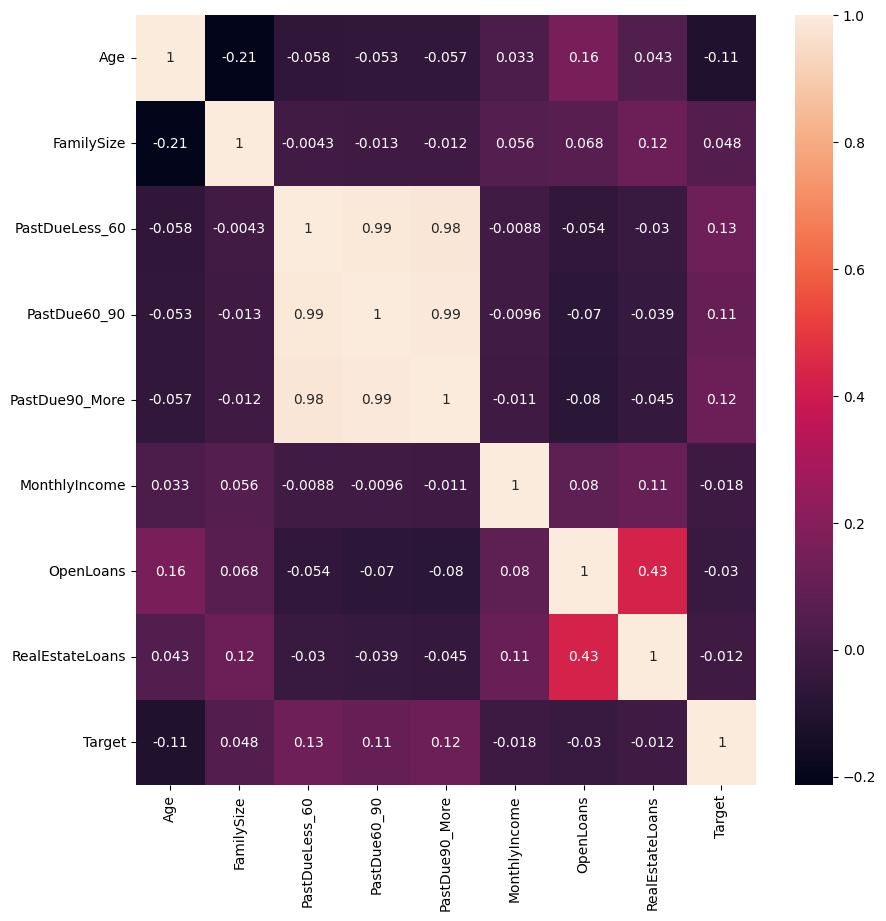

In [ ]:
plt.figure(figsize=(10,10))
correlation_matrix = train_data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)

In [ ]:
sns.scatterplot(data=train_data, x='Age', y='DebtRatio', hue = 'Target', alpha=0.5)
plt.xlim(20, 90)
plt.ylim(-1, 4999)

KeyboardInterrupt: 

In [ ]:
sns.countplot(x='Target', data=train_data)
plt.title('Распределение классов (Target)')
plt.xlabel('Финансовые трудности: 0 - нет, 1 - да')
plt.ylabel('Количество')
plt.show()

We have to notice that data has very unbalanced classes.